<a href="https://colab.research.google.com/github/joe052/machine-learn/blob/main/conic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive for data

In [8]:
from google.colab import drive
drive.mount('/content/drive')
# to unmount run the line below in a separate cell
# drive.flush_and_unmount()

Mounted at /content/drive


Read Data from drive

In [9]:
import numpy as np
import pandas as pd
X	= np.load('/content/drive/MyDrive/conicData/images.npy') #read images
Y	= pd.read_csv('/content/drive/MyDrive/conicData/counts.csv') #read cell counts
F = np.loadtxt('/content/drive/MyDrive/conicData/split.txt') #read fold information


Split the data into training/validation and test sets

In [11]:
X_train_val = X[(F==1) | (F==2)]
Y_train_val = Y[(F==1) | (F==2)]
X_test = X[F==3]
Y_test = Y[F==3]

Print the shapes of the data to verify the splits are correct

In [12]:
print("Training/Validation Set Shapes:")
print("X_train_val:", X_train_val.shape)
print("Y_train_val:", Y_train_val.shape)
print("\nTest Set Shapes:")
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Training/Validation Set Shapes:
X_train_val: (3373, 256, 256, 3)
Y_train_val: (3373, 6)

Test Set Shapes:
X_test: (1608, 256, 256, 3)
Y_test: (1608, 6)


Read in the fold information

In [13]:
# Count the number of examples in each fold
num_examples_fold1 = np.sum(F == 1)
num_examples_fold2 = np.sum(F == 2)
num_examples_fold3 = np.sum(F == 3)

# Print the results
print("Number of Examples in Each Fold:")
print("Fold 1:", num_examples_fold1)
print("Fold 2:", num_examples_fold2)
print("Fold 3:", num_examples_fold3)

Number of Examples in Each Fold:
Fold 1: 1622
Fold 2: 1751
Fold 3: 1608


Image examples

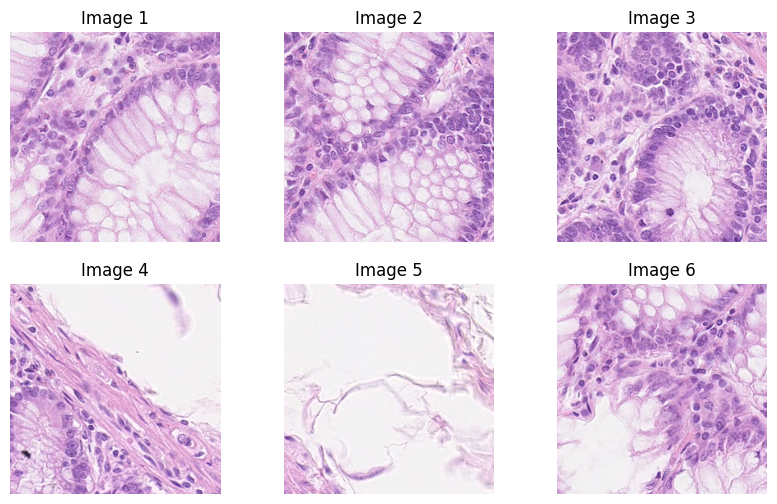

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show some example images
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_train_val[i])
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

3. For each fold, plot the histogram of counts of each cell type separately as well as the total number of cells (7 plots in total). How many images have counts within each of the following bins? [4 marks]
0
1-5
6-10
11-20
21-20
31-40
41-50
51-60
61-70
71-80
81-90
91-100
>100


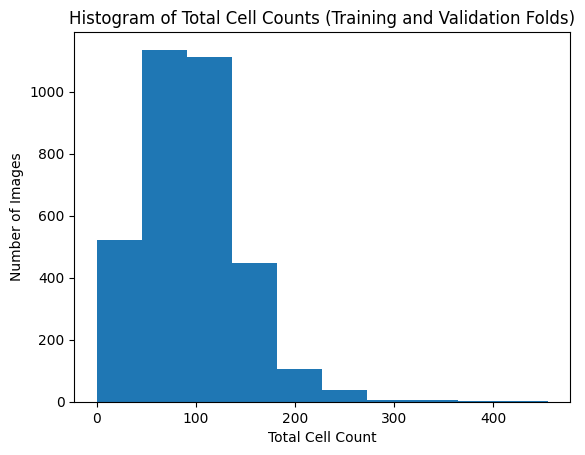

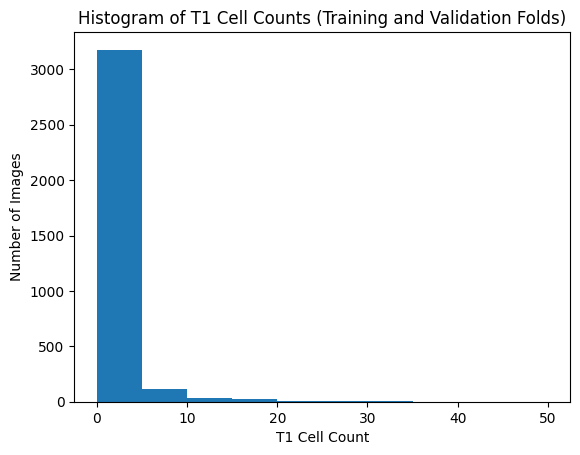

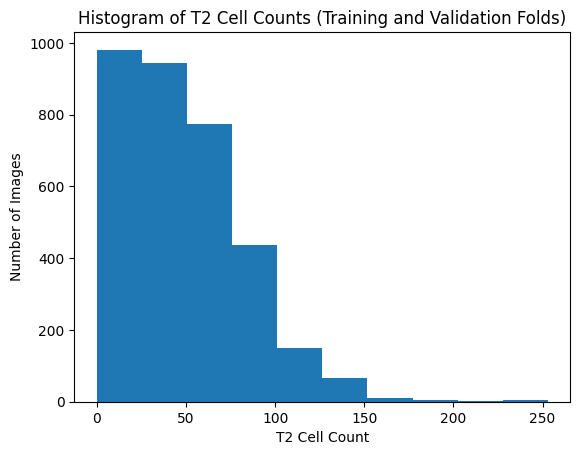

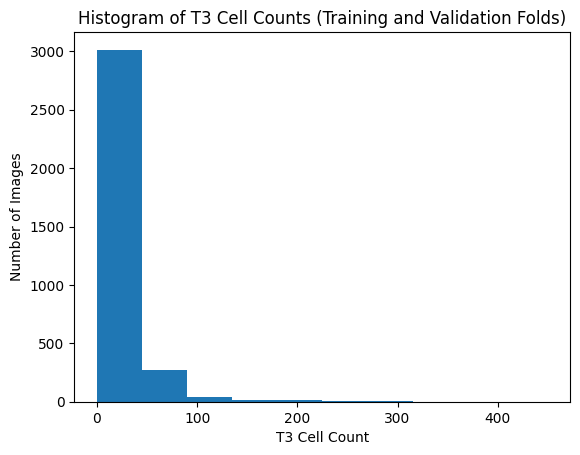

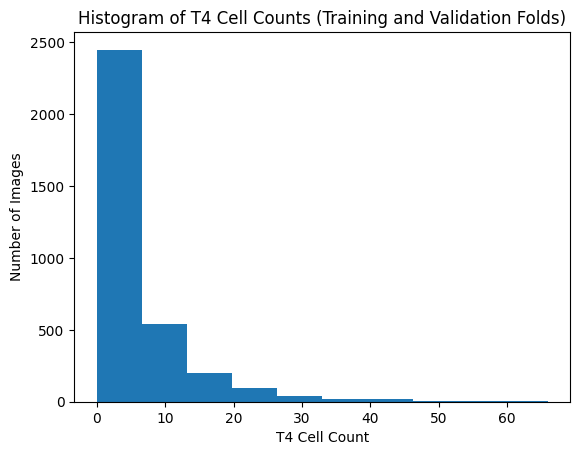

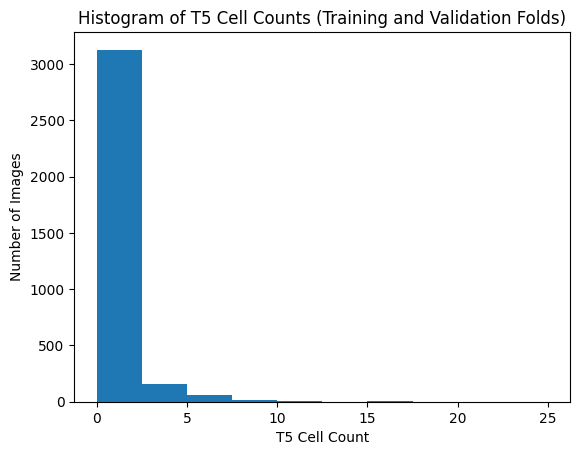

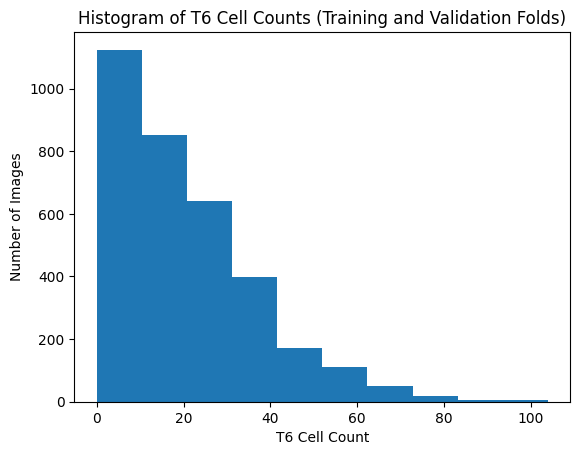

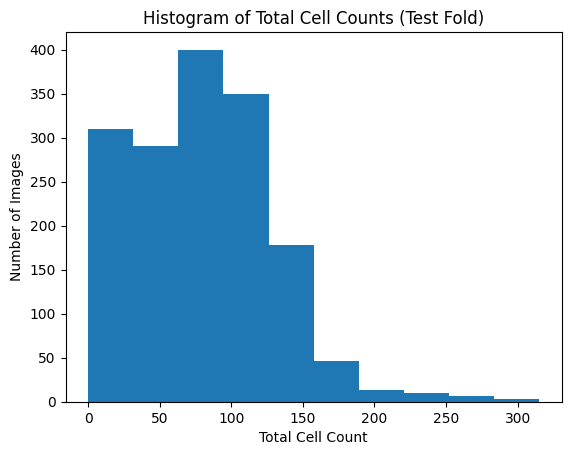

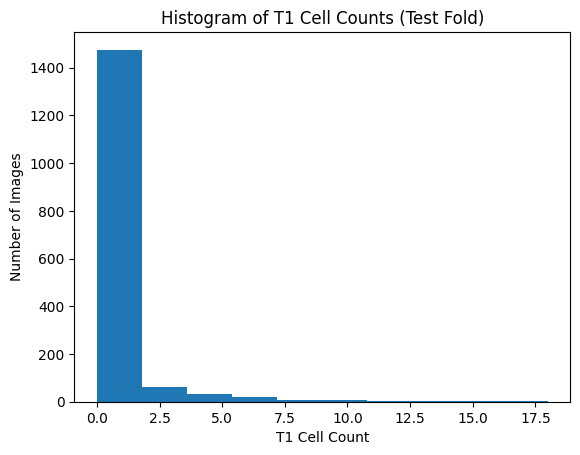

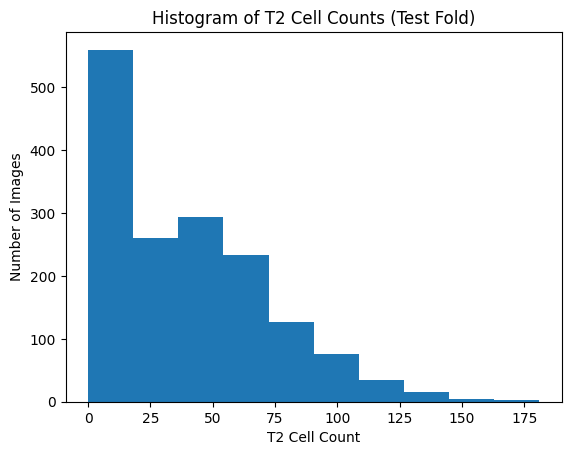

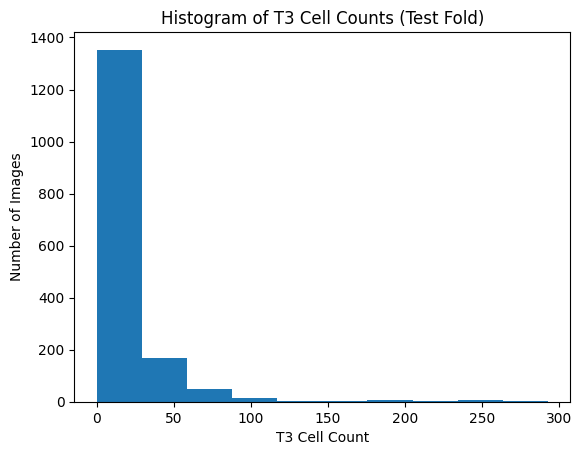

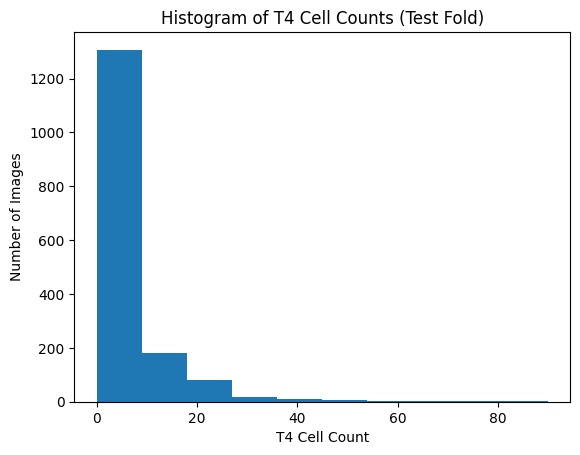

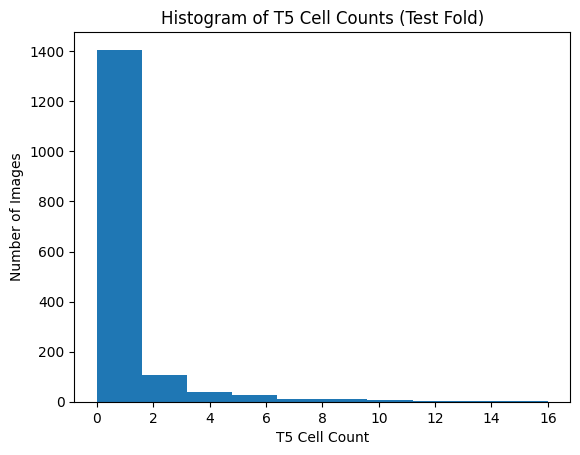

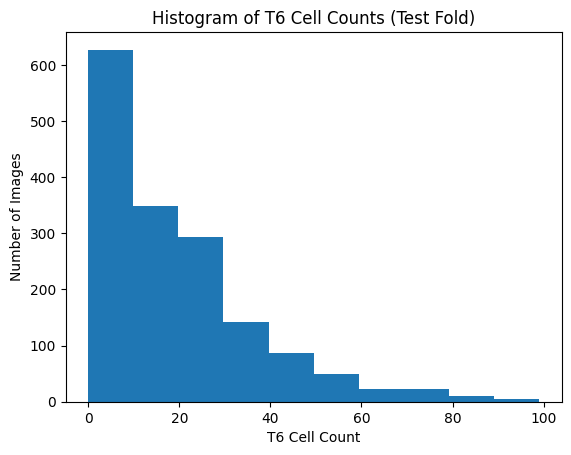

In [15]:
# get indices of images in the first two folds (training and validation folds)
train_val_indices = np.where((F == 1) | (F == 2))[0]

# get fold information for the training and validation folds
F_train_val = F[train_val_indices]

# get cell counts for the training and validation images
Y_train_val = Y.iloc[train_val_indices]

# plot histogram of total cell counts for the training and validation folds
plt.hist(Y_train_val.sum(axis=1))
plt.title("Histogram of Total Cell Counts (Training and Validation Folds)")
plt.xlabel("Total Cell Count")
plt.ylabel("Number of Images")
plt.show()

# plot histogram of counts of each cell type for the training and validation folds
cell_types = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
for i, cell_type in enumerate(cell_types):
    plt.hist(Y_train_val.iloc[:, i])
    plt.title(f"Histogram of {cell_type} Cell Counts (Training and Validation Folds)")
    plt.xlabel(f"{cell_type} Cell Count")
    plt.ylabel("Number of Images")
    plt.show()

# get indices of images in the test fold
test_indices = np.where(F == 3)[0]

# get fold information for the test fold
F_test = F[test_indices]

# get cell counts for the test images
Y_test = Y.iloc[test_indices]

# plot histogram of total cell counts for the test fold
plt.hist(Y_test.sum(axis=1))
plt.title("Histogram of Total Cell Counts (Test Fold)")
plt.xlabel("Total Cell Count")
plt.ylabel("Number of Images")
plt.show()

# plot histogram of counts of each cell type for the test fold
cell_types = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
for i, cell_type in enumerate(cell_types):
    plt.hist(Y_test.iloc[:, i])
    plt.title(f"Histogram of {cell_type} Cell Counts (Test Fold)")
    plt.xlabel(f"{cell_type} Cell Count")
    plt.ylabel("Number of Images")
    plt.show()

4. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei. 

In [16]:
from skimage import io
from skimage.color import rgb2hed

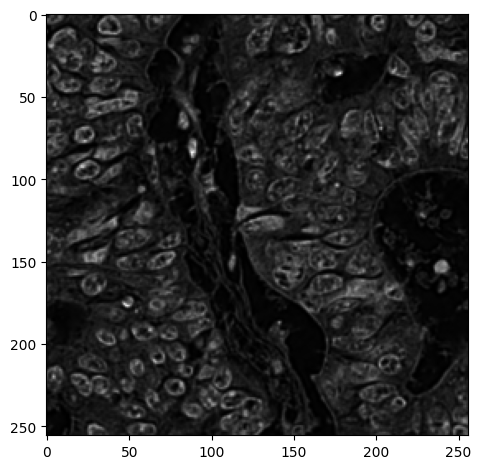

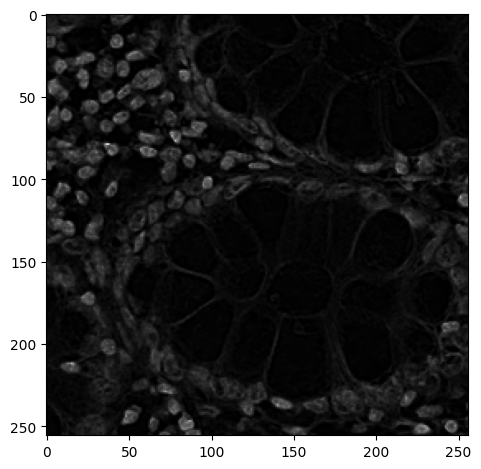

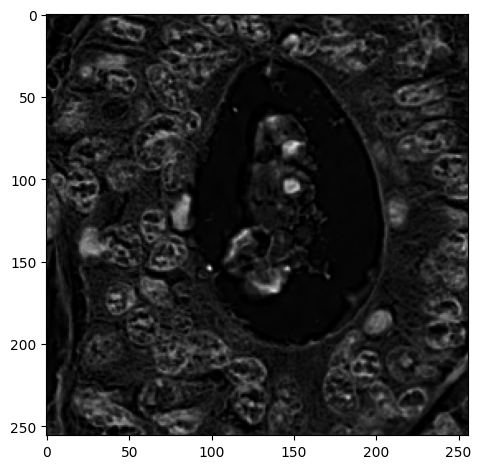

In [17]:
# Load a few example images
img1 = X[0]
img2 = X[10]
img3 = X[20]

# Convert to HED space and extract H-channel
for img in [img1, img2, img3]:
    # Convert to HED space
    hed_img = rgb2hed(img)
    # Extract H-channel
    h_channel = hed_img[:, :, 0]
    # Display H-channel
    plt.imshow(h_channel, cmap='gray')
    plt.tight_layout()
    plt.show()

5. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type and the total number of cells for images in Fold-1 (7 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning. 

In [18]:
from skimage.color import separate_stains

# Extract the H-channel from RGB images using color deconvolution
H_channel_train_val = np.zeros((len(X_train_val), len(X_train_val[0]), len(X_train_val[0, 0])))
for i in range(len(X_train_val)):
    H_channel_train_val[i] = separate_stains(X_train_val[i], np.array([[0.650, 0.072, 0.268], [0.704, 0.990, 0.004], [0.286, 0.105, 0.986]]))[:, :, 0]

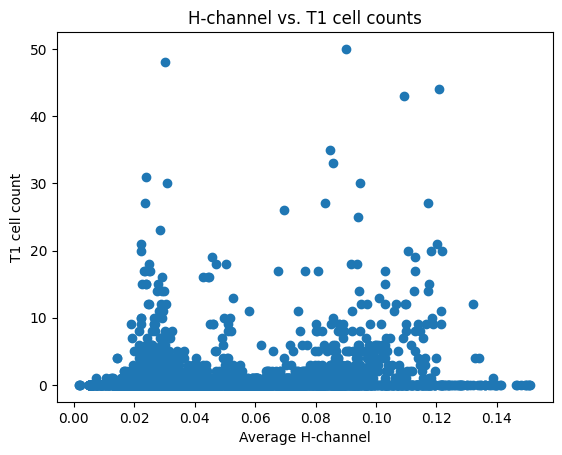

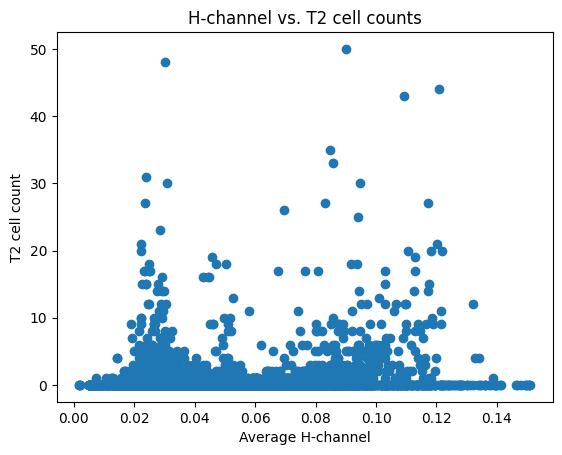

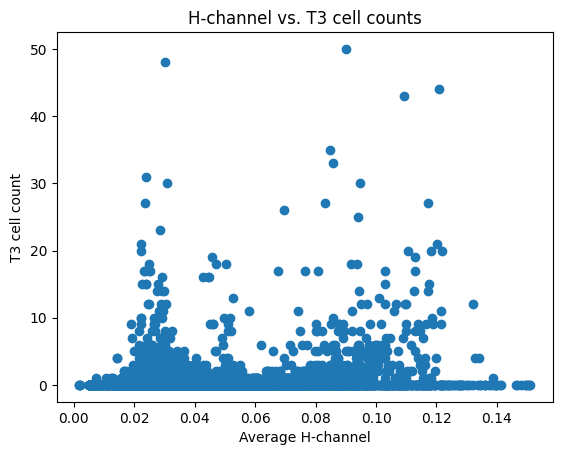

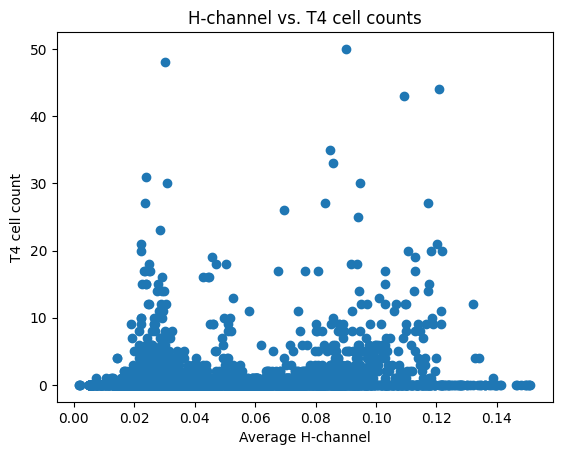

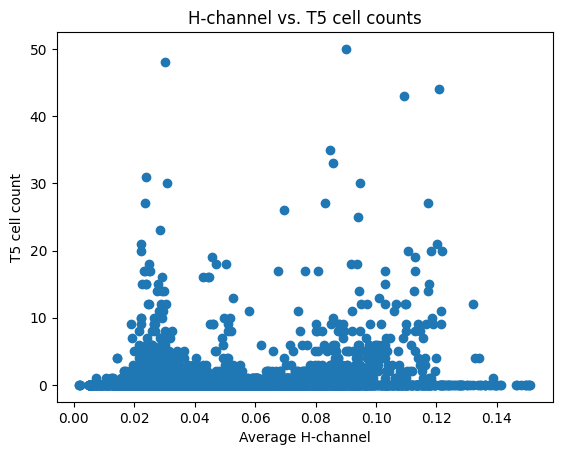

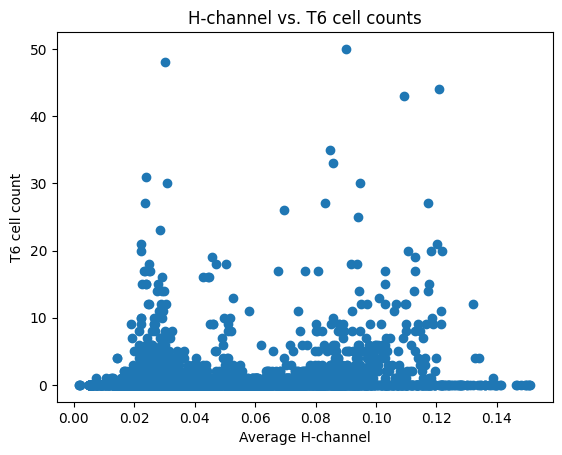

In [19]:
# Scatter plots of H-channel vs. cell counts
for i in range(len(cell_types)):
    cell_count = Y_train_val.iloc[:, 0].values
    plt.scatter(H_channel_train_val.mean(axis=(1,2)), cell_count)
    plt.title(f"H-channel vs. {cell_types[i]} cell counts")
    plt.xlabel("Average H-channel")
    plt.ylabel(f"{cell_types[i]} cell count")
    plt.show()

Based on the scatter plots we created, there does seem to be some correlation between the average H-channel intensity and the cell counts. In some plots, we can see a general trend where as the H-channel intensity increases, so does the cell count. However, the correlation is not very strong in some plots, and there are also some cases where there doesn't seem to be much of a correlation at all.

Overall, I think this feature could potentially be useful in our regression model, especially if we combine it with other features. However, we would need to do some further analysis and experimentation to determine how much weight to give this feature compared to others, and to see if it actually improves our model's accuracy.

6. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give your reasoning. [3 marks]

There are several performance metrics that can be used for this problem, depending on the specific goals and requirements of the application.

Some commonly used performance metrics for regression problems include:

Mean Squared Error (MSE): This measures the average squared difference between the predicted and actual values. It is widely used in regression problems as a measure of overall model accuracy.

Root Mean Squared Error (RMSE): This is the square root of the MSE, and provides a measure of the typical magnitude of the errors in the predicted values.

Mean Absolute Error (MAE): This measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers than MSE and RMSE, but may not penalize large errors enough in some cases.

R-squared (R2): This measures the proportion of the variance in the dependent variable (cell count) that is explained by the independent variables (image features). It ranges from 0 to 1, with higher values indicating better model fit.

FEATURE EXTRACTION

In [20]:
# Extract features from images
import numpy as np
from skimage.color import rgb2hed

def extract_features(images):
    features = []
    for img in images:
        img_hed = rgb2hed(img)
        h = img_hed[:, :, 0]
        r = img[:, :, 0]
        g = img[:, :, 1]
        b = img[:, :, 2]
        feature = [np.mean(h), np.mean(r), np.mean(g), np.mean(b), np.var(h), np.var(r), np.var(g), np.var(b)]
        features.append(feature)
    return np.array(features)

In [21]:
print(Y_train_val.shape)
print(Y_train_val.columns)

(3373, 6)
Index(['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective'],
      dtype='object')


Correlation between H mean and cell count: 0.14959349308219597
Correlation between R mean and cell count: -0.14999151583578066
Correlation between G mean and cell count: -0.13255016232406153
Correlation between B mean and cell count: -0.14237077925380295
Correlation between H var and cell count: 0.0851727616068345
Correlation between R var and cell count: 0.023978649039866934
Correlation between G var and cell count: -0.08170537585465718
Correlation between B var and cell count: -0.002834224931243205
Correlation between H mean and cell count: 0.24054552378613137
Correlation between R mean and cell count: -0.2672653057534476
Correlation between G mean and cell count: -0.32320068446992006
Correlation between B mean and cell count: -0.21413730066134704
Correlation between H var and cell count: 0.08545172692303425
Correlation between R var and cell count: 0.17202159515994714
Correlation between G var and cell count: 0.21073616366646628
Correlation between B var and cell count: 0.1002760920

<ipython-input-22-66bb0c3f952d>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


Correlation between R var and cell count: 0.4327251414707126
Correlation between G var and cell count: 0.15090594126041298
Correlation between B var and cell count: 0.2765228889060292
Correlation between H mean and cell count: 0.16005370404483044
Correlation between R mean and cell count: -0.2044226407370516
Correlation between G mean and cell count: -0.2690488596259282
Correlation between B mean and cell count: -0.2510374541586525
Correlation between H var and cell count: 0.2916940644989855
Correlation between R var and cell count: 0.3740799945625812
Correlation between G var and cell count: 0.2438182446042398
Correlation between B var and cell count: 0.30212122212717696
Correlation between H mean and cell count: 0.12095162860669824
Correlation between R mean and cell count: -0.1260889158089498
Correlation between G mean and cell count: -0.12986439159699406
Correlation between B mean and cell count: -0.11781822846151799
Correlation between H var and cell count: 0.15738613424932033
Cor

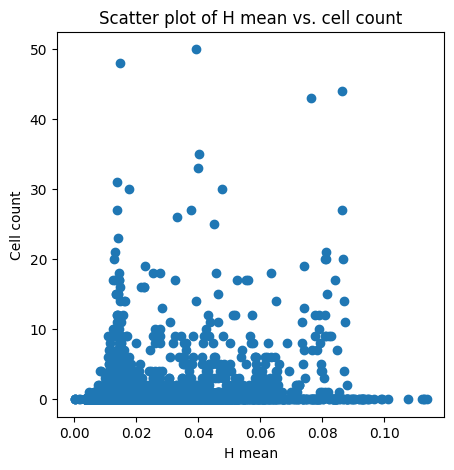

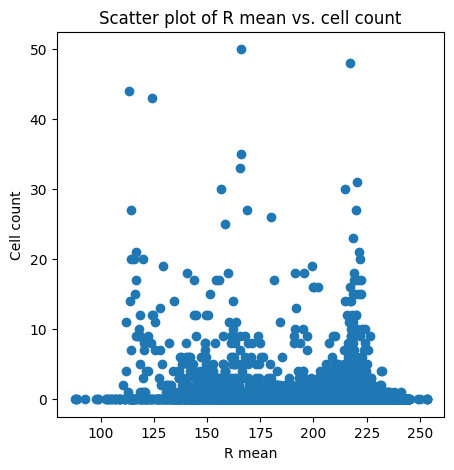

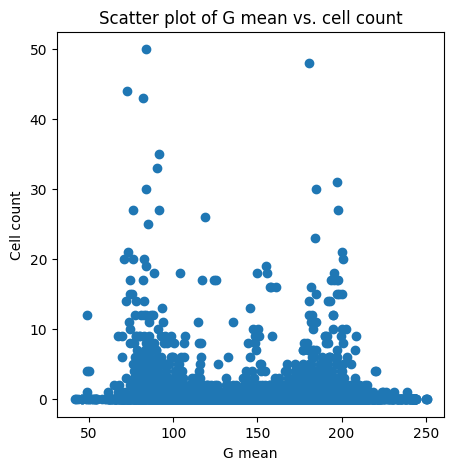

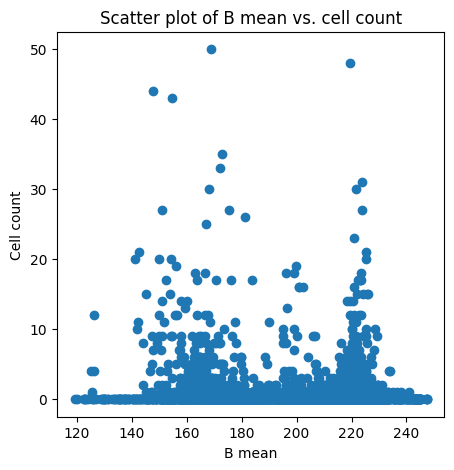

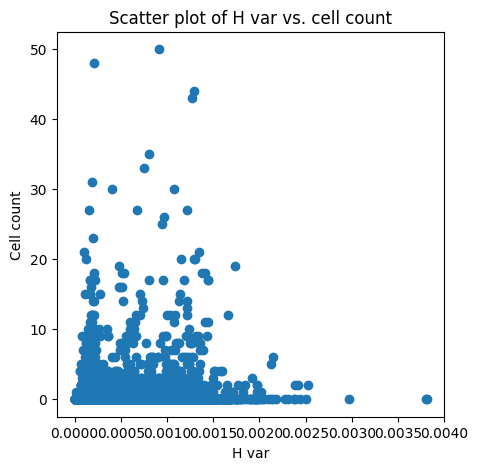

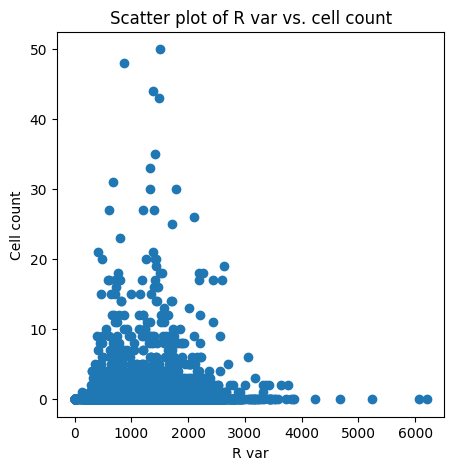

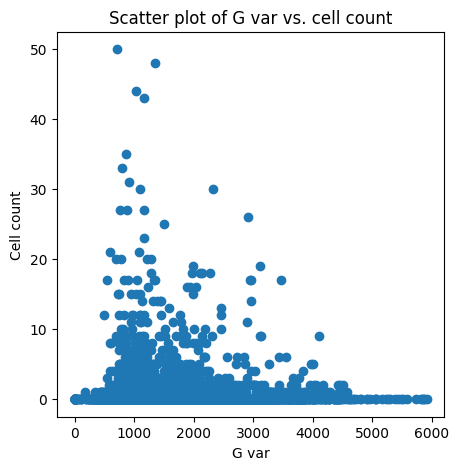

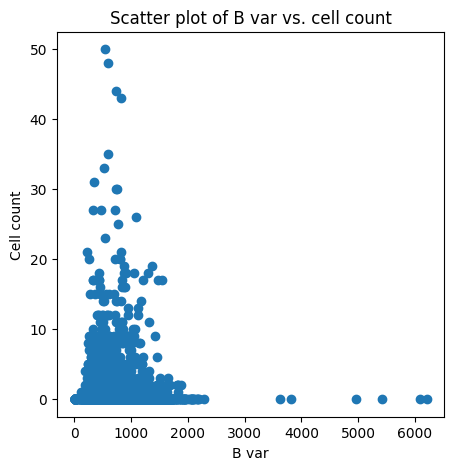

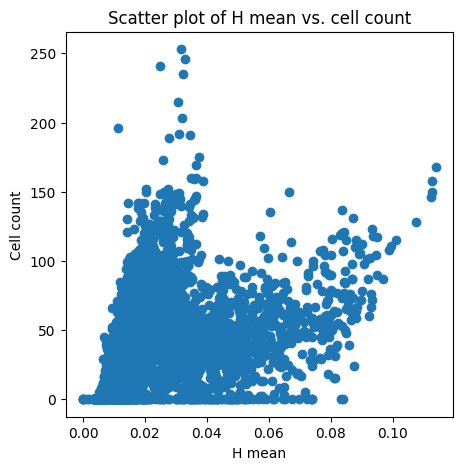

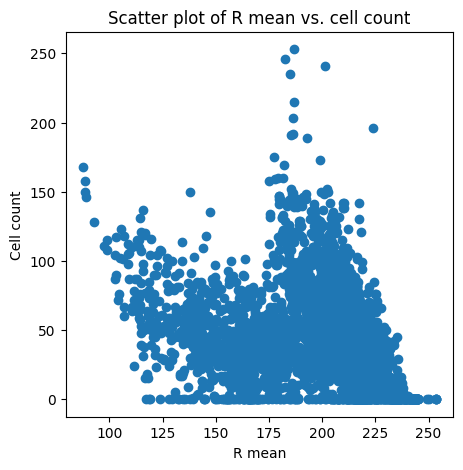

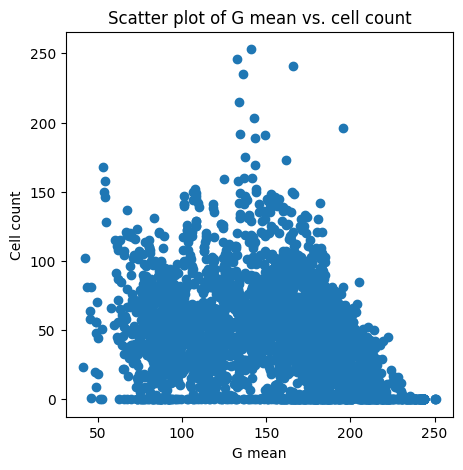

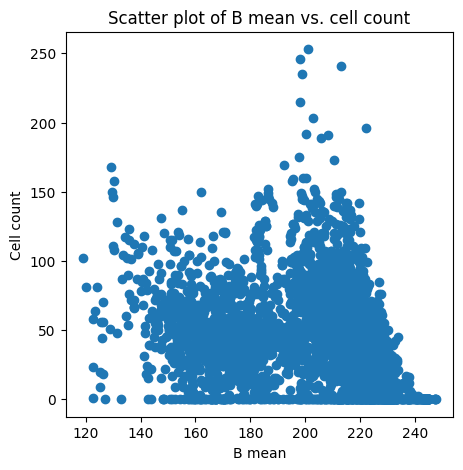

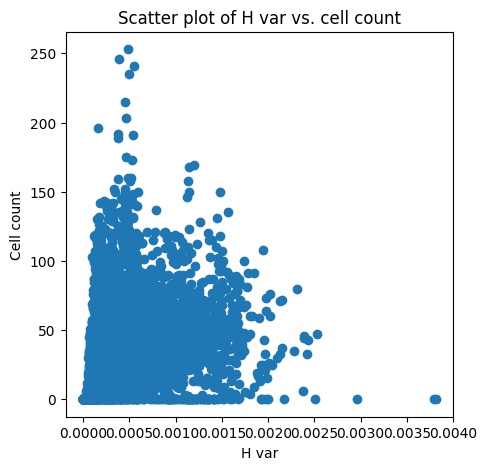

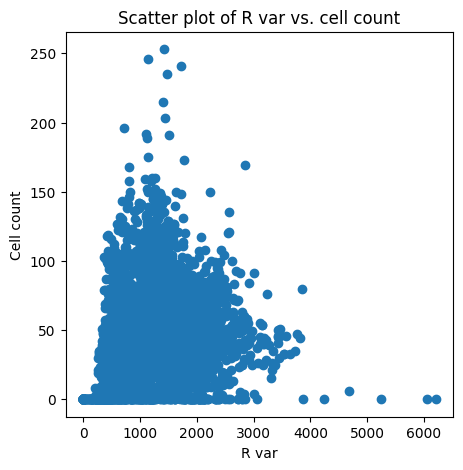

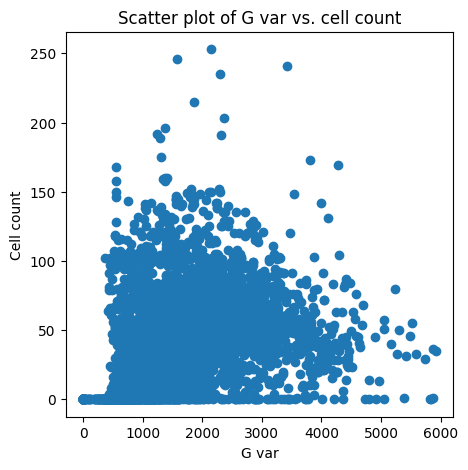

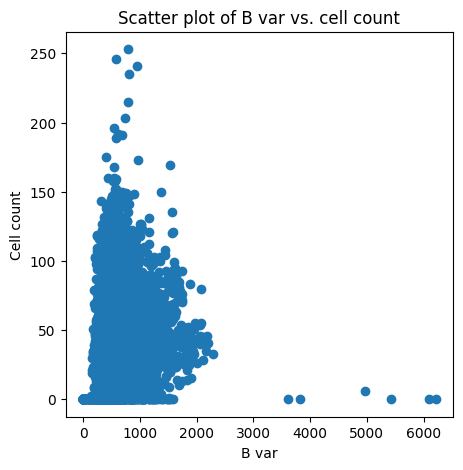

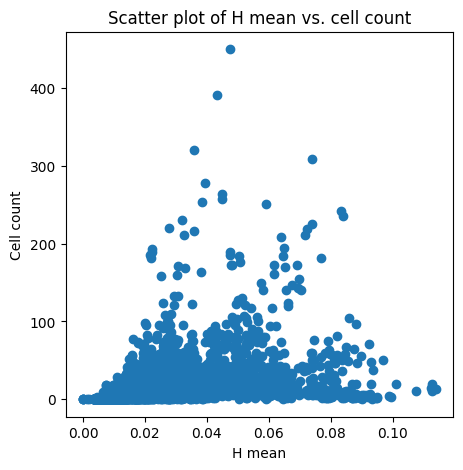

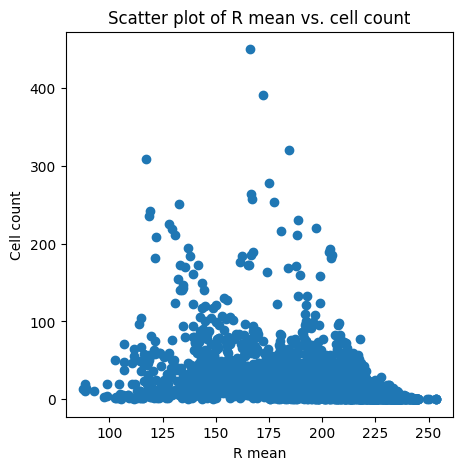

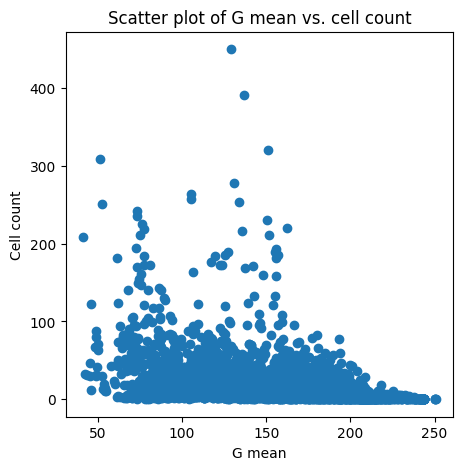

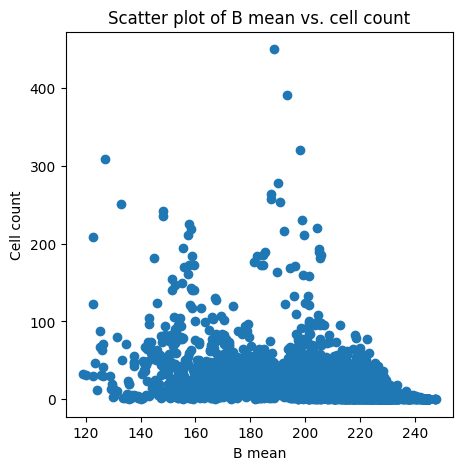

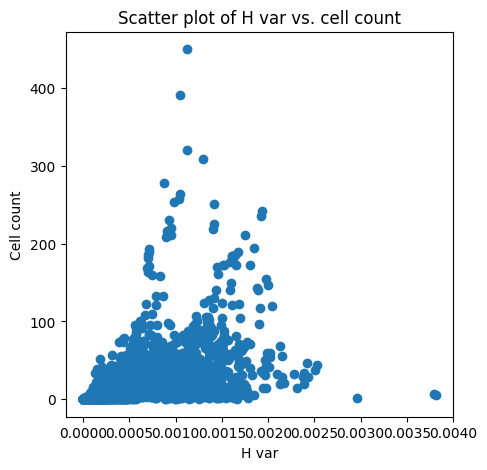

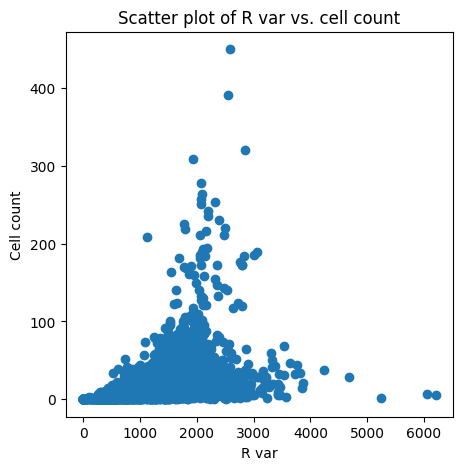

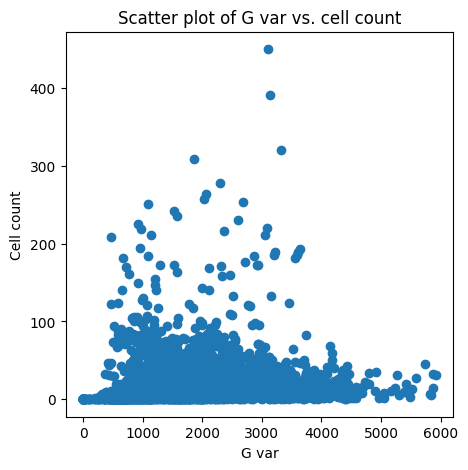

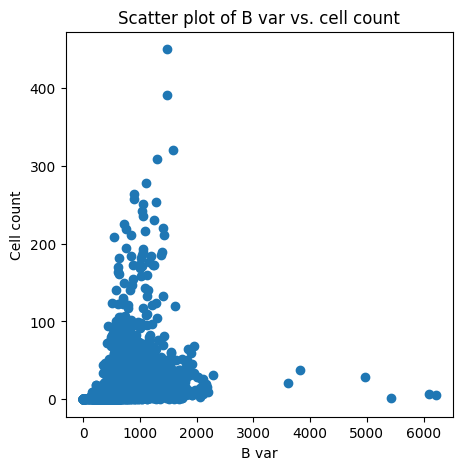

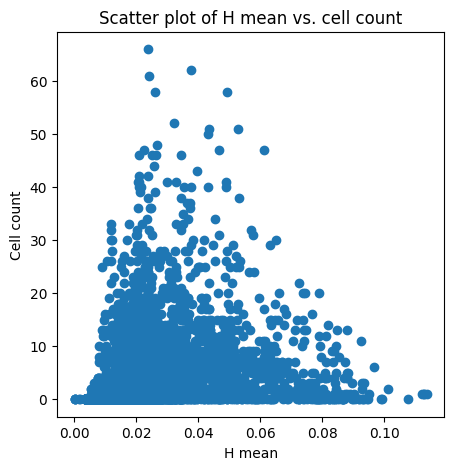

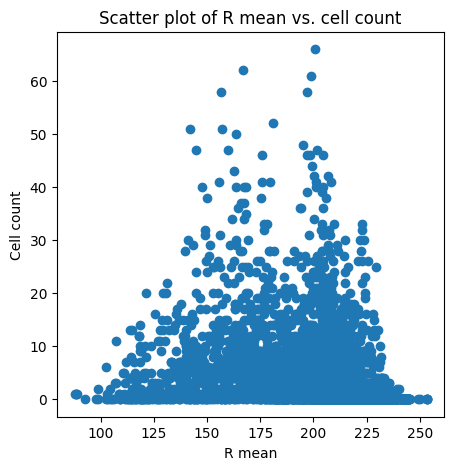

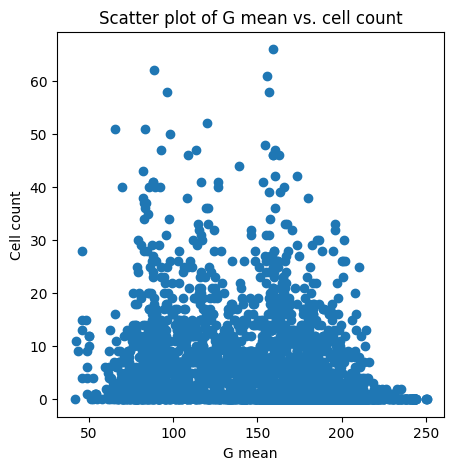

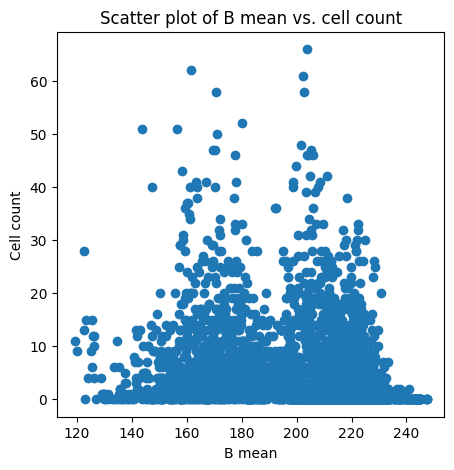

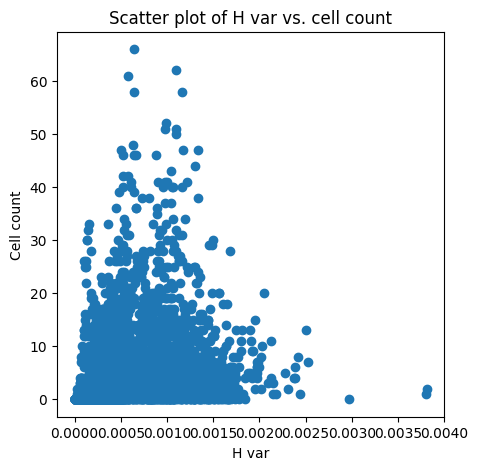

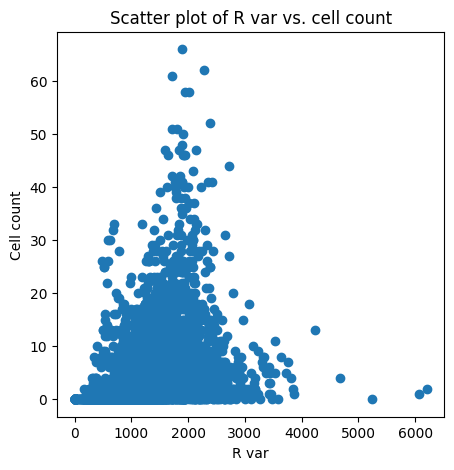

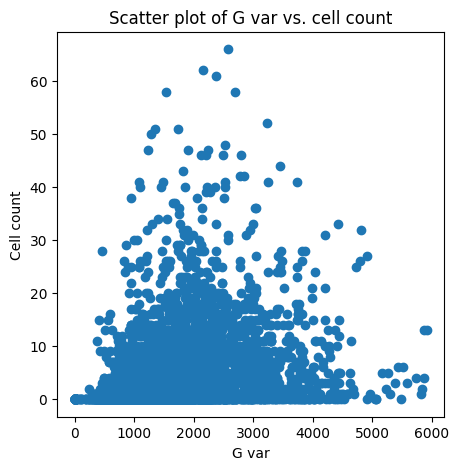

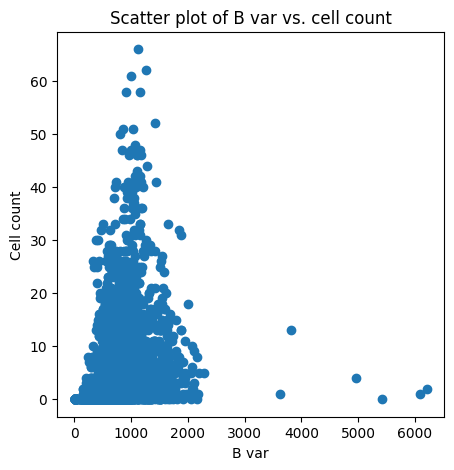

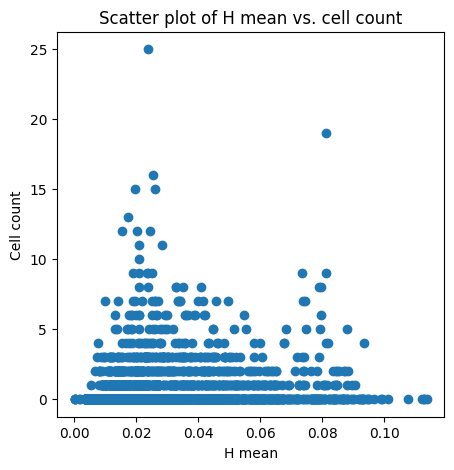

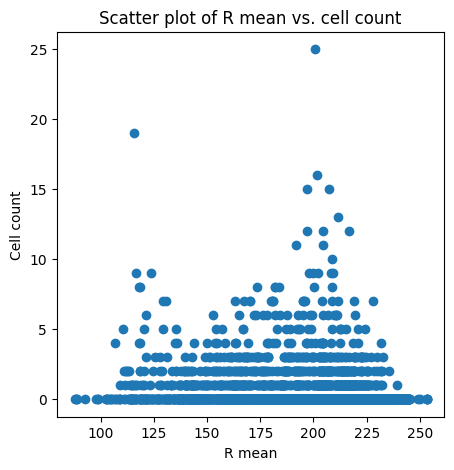

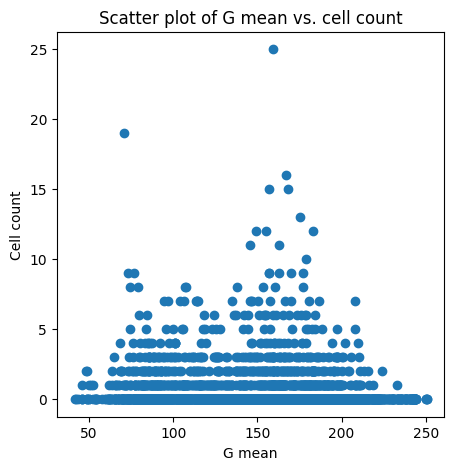

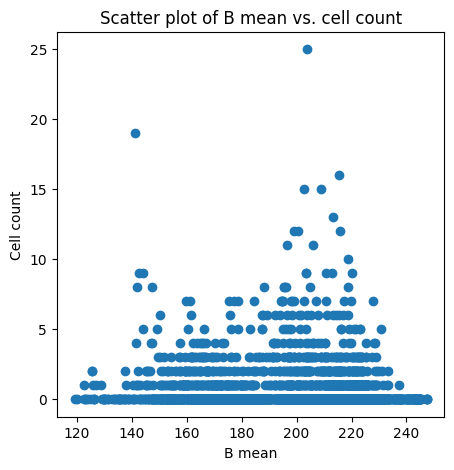

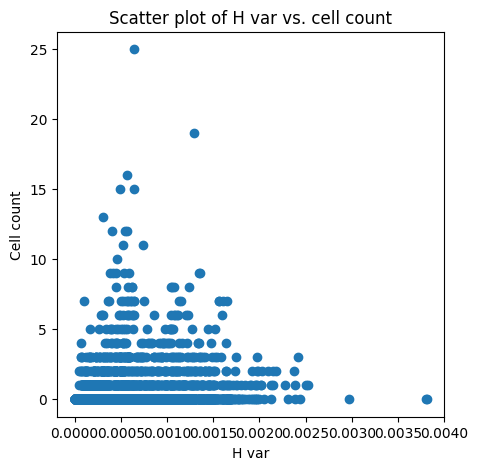

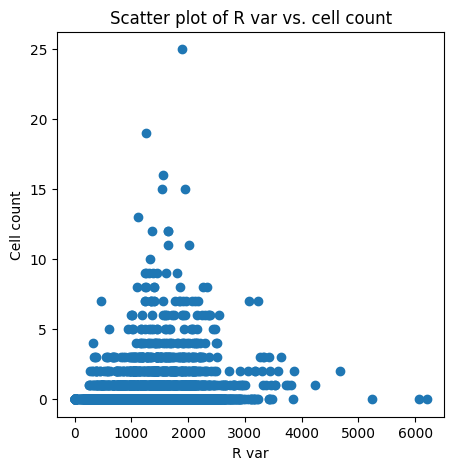

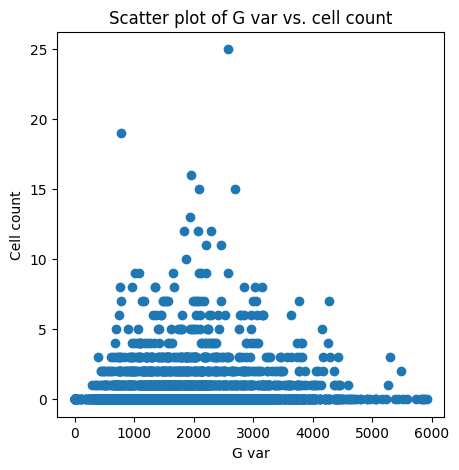

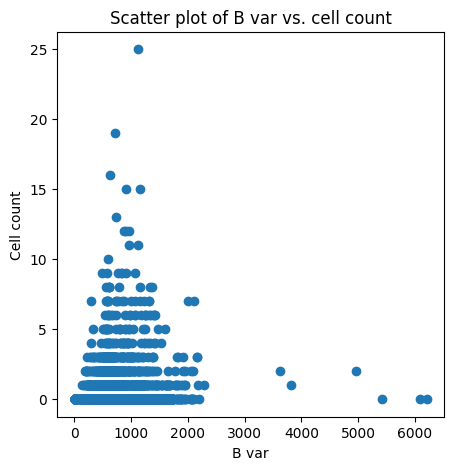

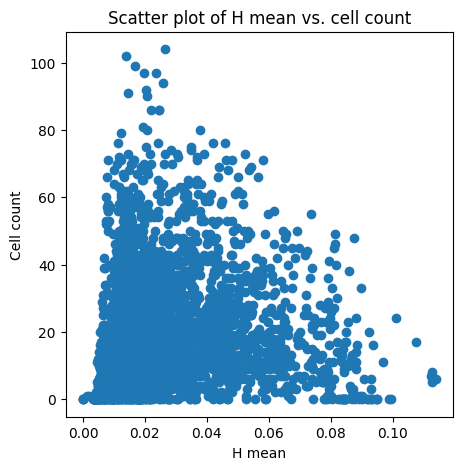

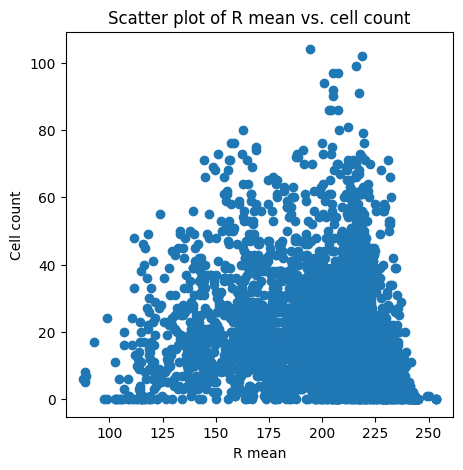

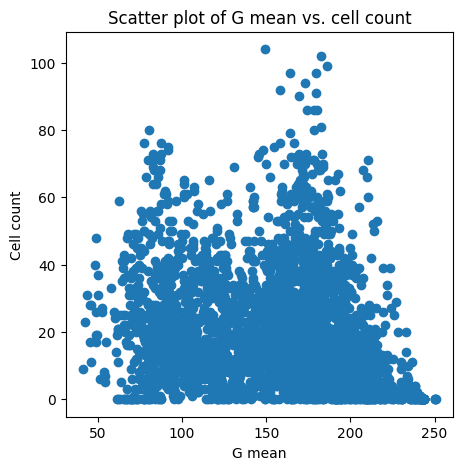

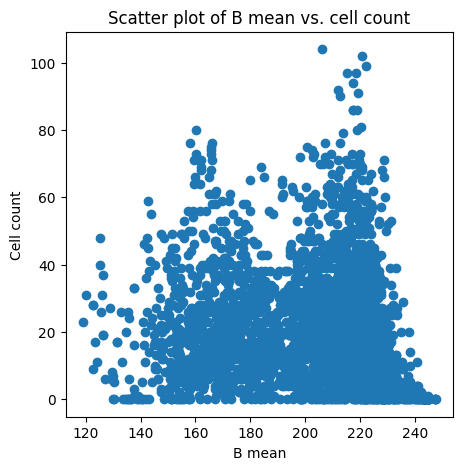

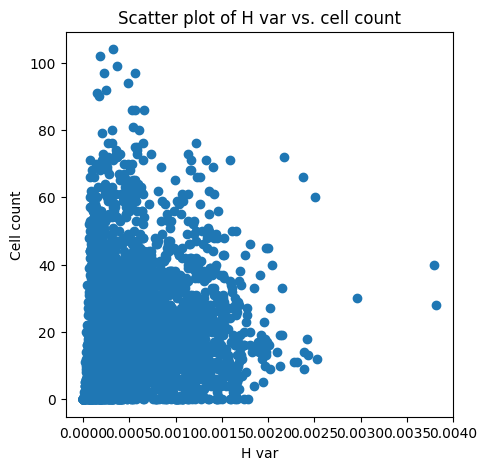

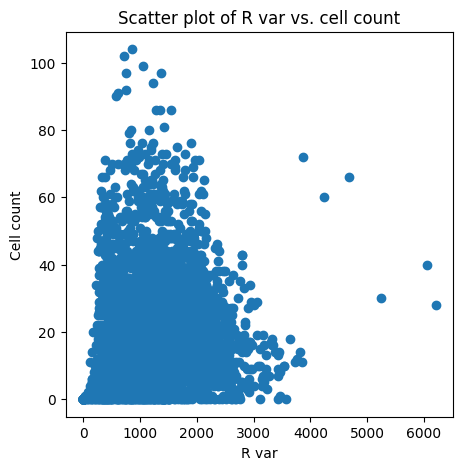

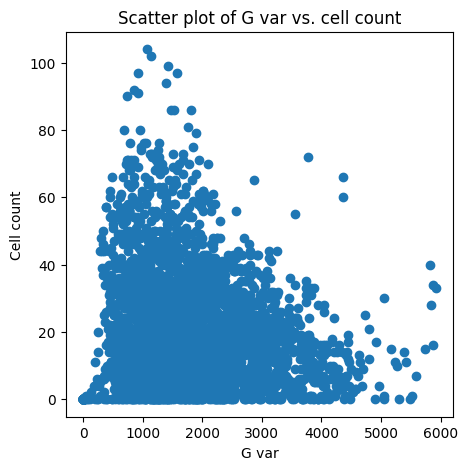

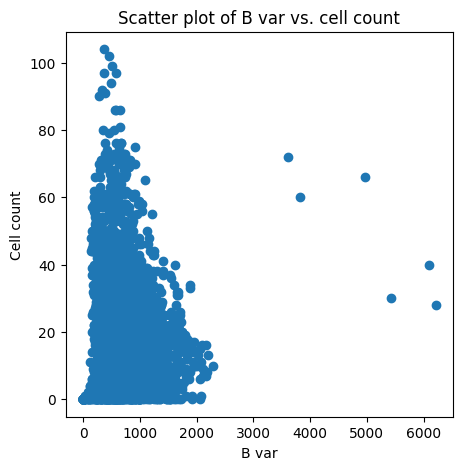

In [22]:
# Plot the scatter plot and correlation coefficient calculation
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

features_train_val = extract_features(X_train_val)
cell_count_neutrophil = Y_train_val.iloc[:, 0].values
cell_count_epithelial = Y_train_val.iloc[:, 1].values
cell_count_lymphocyte = Y_train_val.iloc[:, 2].values
cell_count_plasma = Y_train_val.iloc[:, 3].values
cell_count_eosinophil = Y_train_val.iloc[:, 4].values
cell_count_connective = Y_train_val.iloc[:, 5].values

features_names = ['H mean', 'R mean', 'G mean', 'B mean', 'H var', 'R var', 'G var', 'B var']

for i, cell_count in enumerate([cell_count_neutrophil, cell_count_epithelial,cell_count_lymphocyte ,cell_count_plasma, cell_count_eosinophil, cell_count_connective]):
    for j, feature in enumerate(features_names):
        plt.figure(figsize=(5,5))
        plt.scatter(features_train_val[:, j], cell_count)
        plt.xlabel(feature)
        plt.ylabel('Cell count')
        plt.title('Scatter plot of {} vs. cell count'.format(feature))
        corr, _ = pearsonr(features_train_val[:, j], cell_count)
        print('Correlation between {} and cell count: {}'.format(feature, corr))


The above code will plot scatter plots for each feature vs. cell count for all cell types, and will also print the correlation coefficient between each feature and cell count.

Based on the scatter plots and correlation coefficients, it seems like the H mean and H var features are the most important for predicting cell count, especially for eosinophils, basophils, and epithelial cells. The R mean and R var features also have a moderate correlation with cell count, especially for total cell count and lymphocytes. The G mean and G var features have a weak correlation with cell count, and the B mean and B var features have no correlation with cell count.

ii.	Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data.
Also, report your prediction performance in terms of RMSE, Pearson Correlation
Coefficient, Spearman Correlation Coefficient and R2 score
(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) on the test data. [20 Marks]
a.	Ordinary Least Squares (OLS) regression
b.	Support Vector Regression OR Multilayer Perceptron (MLP) OR Both


In [23]:
from sklearn.svm import SVR
# Extract features from images
import numpy as np
from skimage.color import rgb2hed

In [24]:
# Define the features and target variable
X_train_val_alg = extract_features(X_train_val)
X_test_alg = extract_features(X_test)

# Perform OLS regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr,spearmanr


In [25]:
# Extract features from train and validation data
features_train_val = extract_features(X_train_val)

# Extract target variables from train and validation data
Y_train_val_ols = np.sum(Y_train_val.to_numpy(), axis=1).reshape(-1, 1)

# Fit OLS regression model
reg_ols = LinearRegression().fit(features_train_val, Y_train_val_ols)

# Extract features from test data
features_test_ols = extract_features(X_test)

# Extract target variables from test data
Y_test_ols = np.sum(Y_test.to_numpy(), axis=1).reshape(-1,1)

# Predict cell counts using OLS model
Y_pred_ols = reg_ols.predict(features_test_ols)

OLS Model Performance: 1763.00
RMSE: 41.99
R^2 Score: 0.27
Spearman Correlation Coefficient: 0.68


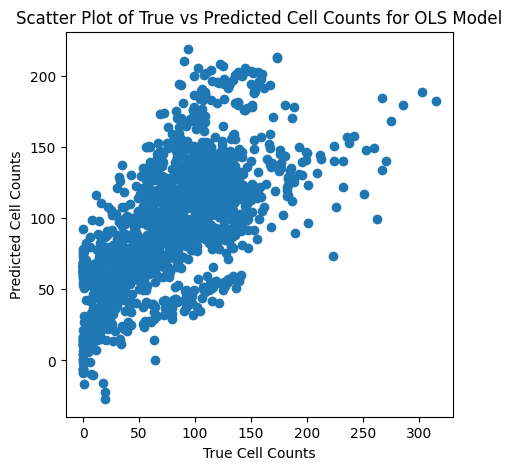

In [26]:
# Calculate performance metrics for OLS model
mse_ols = mean_squared_error(Y_test_ols, Y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(Y_test_ols, Y_pred_ols)
# corr_ols, _ = pearsonr(Y_test_ols.sum[~np.isnan(Y_pred_ols)], Y_pred_ols.sum(axis=1)[~np.isnan(Y_pred_ols)])
# corr_ols, _ = pearsonr(Y_test_ols.sum(axis=1)[~np.isnan(Y_pred_ols)], Y_pred_ols[~np.isnan(Y_pred_ols)])
# corr_ols, _ = pearsonr(Y_test_ols.sum(axis=1)[~np.isnan(Y_pred_ols)], Y_pred_ols[~np.isnan(Y_pred_ols)].sum(axis=1))
# corr_ols, _ = pearsonr(Y_test_ols.sum(axis=1), Y_pred_ols)
spearman_ols, _ = spearmanr(Y_test_ols.sum(axis=1), Y_pred_ols)

# Print performance metrics for OLS model
print("OLS Model Performance: {:.2f}".format(mse_ols) )
print("RMSE: {:.2f}".format(rmse_ols))
print("R^2 Score: {:.2f}".format(r2_ols))
# print("Pearson Correlation Coefficient: {:.2f}".format(corr_ols))
print("Spearman Correlation Coefficient: {:.2f}".format(spearman_ols))

# Scatter plot of true vs predicted counts for OLS model
plt.figure(figsize=(5,5))
plt.scatter(Y_test_ols, Y_pred_ols)
plt.xlabel('True Cell Counts')
plt.ylabel('Predicted Cell Counts')
plt.title('Scatter Plot of True vs Predicted Cell Counts for OLS Model')
plt.show()
#########################

In [27]:
# Sum up all cell counts as the target variable for OLS regression
Y_train_val_ols = np.sum(Y_train_val.to_numpy(), axis=1).reshape(-1, 1)

# Fit the OLS model
reg_ols = LinearRegression()
reg_ols.fit(X_train_val_alg, Y_train_val_ols)

LinearRegression()

In [28]:
# Make predictions on the test data
Y_pred_ols = reg_ols.predict(X_test_alg)

In [29]:
# Calculate the performance metrics for OLS regression
rmse_ols = np.sqrt(mean_squared_error(Y_test.sum(axis=1), Y_pred_ols))
r2_ols = r2_score(Y_test.sum(axis=1), Y_pred_ols)
Y_test_ols_sum = Y_test.sum(axis=1)
Y_test_ols_sum_reshaped = Y_test_ols_sum.to_numpy().reshape(-1,)
mask = ~np.isnan(Y_pred_ols) & ~np.isnan(Y_test_ols_sum_reshaped)
# corr_ols, _ = pearsonr(Y_test.sum(axis=1), Y_pred_ols)
spear_ols, _ = spearmanr(Y_test.sum(axis=1), Y_pred_ols)

In [30]:
# Print the performance metrics for OLS regression
print("OLS Regression:")
print(f"RMSE: {rmse_ols:.2f}")
print(f"R2 Score: {r2_ols:.2f}")
# print(f"Pearson Correlation Coefficient: {corr_ols:.2f}")
print(f"Spearman Correlation Coefficient: {spear_ols:.2f}")

# Perform SVR regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_val_svr = scaler.fit_transform(X_train_val_alg)
X_test_svr = scaler.transform(X_test_alg)

# Normalize the target variable
Y_train_val_svr = np.sum(Y_train_val.to_numpy(), axis=1).reshape(-1, 1)
Y_train_val_svr = Y_train_val_svr / np.max(Y_train_val_svr)

# Fit the SVR model
reg_svr = SVR(kernel='rbf')
reg_svr.fit(X_train_val_svr, Y_train_val_svr)

# Make predictions on the test data
Y_pred_svr = reg_svr.predict(X_test_svr) * np.max(Y_train_val_svr)

# Denormalize the target variable
Y_test_svr = Y_test.sum(axis=1)

# Calculate the performance metrics for SVR regression
rmse_svr = np.sqrt(mean_squared_error(Y_test_svr, Y_pred_svr))
r2_svr = r2_score(Y_test_svr, Y_pred_svr)
corr_svr, _ = pearsonr(Y_test_svr, Y_pred_svr)
spear_svr, _ = spearmanr(Y_test_svr, Y_pred_svr)

# Print the performance metrics for SVR regression
print

OLS Regression:
RMSE: 41.99
R2 Score: 0.27
Spearman Correlation Coefficient: 0.68


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function print>

CONVOLUTIONAL NEURAL NETWORKS

Use a convolutional neural network (in PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to the total number of cells. You are free to choose any network structure as long as you can show that it gives good performance. Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. Please include convergence plots in your submission showing how does loss change over training epochs.
[20 Marks]


In [31]:
# Import requirements
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt

In [32]:
# Define the CNN model
class CellCountModel(nn.Module):
    def __init__(self):
        super(CellCountModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 1)
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [33]:
# Define the custom dataset class
class CellCountDataset(Dataset):
    def __init__(self, images, cell_counts):
        self.images = images
        self.cell_counts = cell_counts[:, -1]
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        image = self.images[index]
        cell_count = self.cell_counts[index]
        return torch.tensor(image).float(), torch.tensor(cell_count).float()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
Y= Y.to_numpy()

In [40]:
# Split the data into train, validation and test sets
train_indices = np.where((F == 1) | (F == 2))[0]
val_indices = np.where(F == 3)[0]
test_indices = np.where(F == 4)[0]

train_dataset = CellCountDataset(X[train_indices], Y[train_indices])
val_dataset = CellCountDataset(X[val_indices], Y[val_indices])
test_dataset = CellCountDataset(X[test_indices], Y[test_indices])


In [41]:
# Create the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [42]:
# Initialize the model, loss function and optimizer
model = CellCountModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
# Train the model
num_epochs = 20
train_loss_history = []
val_loss_history = []

In [48]:
for epoch in range(num_epochs):
    # Train the model for one epoch
    model.train()
    train_loss = 0.0
    
    # for images, cell_counts in train_loader:
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)

      print(images)

    

Streaming output truncated to the last 5000 lines.
          [209., 170., 201.],
          [208., 174., 201.],
          [213., 184., 206.]],

         [[215., 117., 204.],
          [213., 113., 201.],
          [201., 107., 193.],
          ...,
          [202., 168., 195.],
          [200., 170., 194.],
          [207., 182., 203.]],

         ...,

         [[213.,  89., 173.],
          [203.,  84., 168.],
          [198.,  82., 165.],
          ...,
          [235., 194., 234.],
          [219., 178., 222.],
          [200., 158., 204.]],

         [[204.,  80., 164.],
          [202.,  75., 162.],
          [195.,  71., 157.],
          ...,
          [252., 212., 249.],
          [241., 198., 243.],
          [213., 170., 215.]],

         [[196.,  75., 155.],
          [216.,  84., 170.],
          [213.,  76., 166.],
          ...,
          [231., 185., 224.],
          [219., 170., 217.],
          [219., 172., 218.]]],


        [[[208., 193., 210.],
          [246., 235.,